In [1]:
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from utilities import visualize_classifier

In [2]:
input_file='data_multivar_nb.txt'
# Load data from input file
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]


Accuracy of Naïve Bayes classifier = 99.75 %


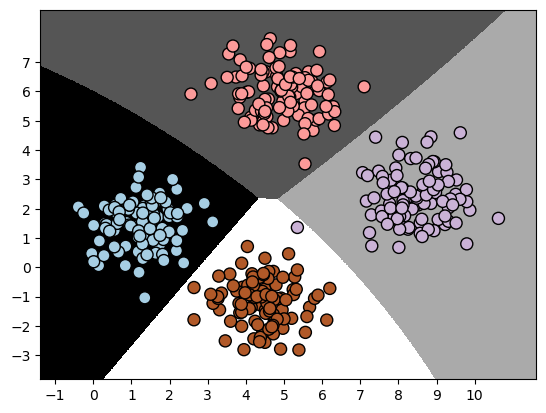

In [3]:
# Create Naïve Bayes classifier
classifier = GaussianNB()
# Train the classifier
classifier.fit(X, y)
# Predict the values for training data
y_pred = classifier.predict(X)
# Compute accuracy
accuracy = 100.0 * (y == y_pred).sum() / X.shape[0]
print("Accuracy of Naïve Bayes classifier =", round(accuracy, 2), "%")
# Visualize the performance of the classifier
visualize_classifier(classifier, X, y)


In [4]:
# Split data into training and test data
X_train, X_test, y_train, y_test =train_test_split(X, y,test_size=0.2, random_state=3)
classifier_new = GaussianNB()
classifier_new.fit(X_train, y_train)
y_test_pred = classifier_new.predict(X_test)

In [5]:
num_folds = 3
accuracy_values = cross_val_score(classifier,
 X, y, scoring='accuracy', cv=num_folds)
print("Accuracy: " + str(round(100*accuracy_values.mean(), 2)) + "%")
precision_values = cross_val_score(classifier,
 X, y, scoring='precision_weighted', cv=num_folds)
print("Precision: " + str(round(100*precision_values.mean(), 2)) + "%")
recall_values = cross_val_score(classifier,
 X, y, scoring='recall_weighted', cv=num_folds)
print("Recall: " + str(round(100*recall_values.mean(), 2)) + "%")
f1_values = cross_val_score(classifier,
 X, y, scoring='f1_weighted', cv=num_folds)
print("F1: " + str(round(100*f1_values.mean(), 2)) + "%")

Accuracy: 99.75%
Precision: 99.76%
Recall: 99.75%
F1: 99.75%
